# BDML Coursework (2035032)

# Imports and Pip installs

In [1]:
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install scikit-image

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm
import skimage.feature
import sklearn.decomposition
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix

# Initialise Datasets

In [3]:
trainImages = np.load('trnImage.npy')
trainLabelsC = np.load('trnLabel_coarse.npy')
trainLabelsF = np.load('trnLabel_fine.npy')

# reformat the axes of the array
trainImages = np.transpose(trainImages, (3, 0, 1, 2))

testImages = np.load('tstImage.npy')
testLabelsC = np.load('tstLabel_coarse.npy')
testLabelsF = np.load('tstLabel_fine.npy')

# reformat the axes of the array
testImages = np.transpose(testImages, (3, 0, 1, 2))

In [4]:
# Extract the features from the images

trainFeatures = []
testFeatures = []

for i in range(len(trainImages)):
    hogFeature = skimage.feature.hog(trainImages[i], pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=False, channel_axis = 2)
    trainFeatures.append(hogFeature)
    print(i)
    
for i in range(len(testImages)):
    hogFeature = skimage.feature.hog(testImages[i], pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=False, channel_axis = 2)
    testFeatures.append(hogFeature)
    print(i)
    
trainData = np.array(trainFeatures)
testData = np.array(testFeatures)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Coarse Labels Methods + Results

## Method 1: Convolutional Neural Network

In [4]:
CNN = tf.keras.Sequential(layers=[tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu, input_shape = (32, 32, 3)),
                          tf.keras.layers.MaxPooling2D((2, 2)), 
                          tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
                          tf.keras.layers.MaxPooling2D((2, 2)), 
                          tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu)])

CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(64, activation= tf.nn.relu))
CNN.add(tf.keras.layers.Dense(20))

In [5]:
CNN.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNN.fit(trainImages, trainLabelsC, epochs=10, 
                    validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 20s 15ms/step - loss: 2.8846 - accuracy: 0.1027 - val_loss: 2.7503 - val_accuracy: 0.1345
Epoch 2/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.6428 - accuracy: 0.1814 - val_loss: 2.5360 - val_accuracy: 0.2241
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.4863 - accuracy: 0.2359 - val_loss: 2.4217 - val_accuracy: 0.2584
Epoch 4/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.3647 - accuracy: 0.2717 - val_loss: 2.3455 - val_accuracy: 0.2776
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.2753 - accuracy: 0.2974 - val_loss: 2.2563 - val_accuracy: 0.3027
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.2002 - accuracy: 0.3217 - val_loss: 2.2061 - val_accuracy: 0.3214
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 2.1329 - accuracy: 0.3453 - val_loss: 2.1232 -

313/313 [==============================] - 2s 5ms/step - loss: 1.9804 - accuracy: 0.3914
Test set loss: 1.98, test set accuracy: 39.14%


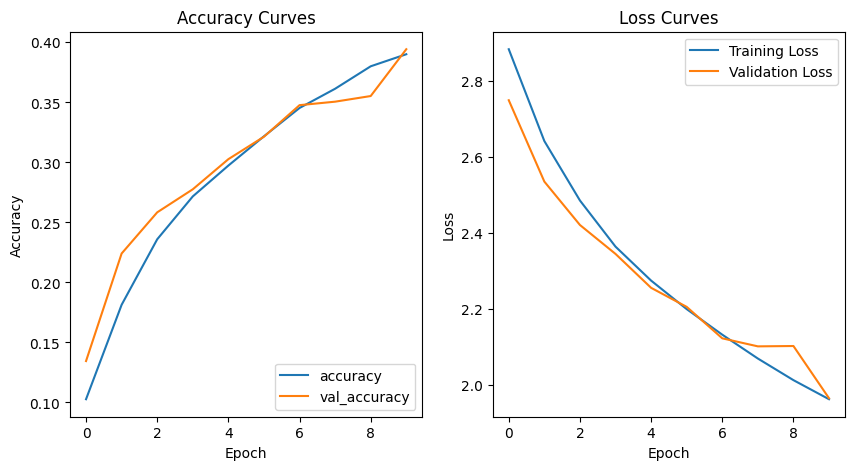

In [6]:
results = CNN.evaluate(testImages, testLabelsC)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [7]:
predicted = CNN(testImages)
predicted = predicted.numpy()
predictedLabels = []
for result in predicted:
    temp = np.array(result)
    label = np.where(result == max(result))
    predictedLabels.append(label[0][0])

confusionMatrix = tf.math.confusion_matrix(testLabelsC, predictedLabels)

In [8]:
for line in confusionMatrix:
    array = []
    for char in line:
        array.append(char.numpy())
    print(array)

[160, 73, 1, 18, 2, 8, 14, 21, 33, 11, 14, 37, 12, 5, 8, 36, 10, 11, 11, 15]
[23, 254, 20, 20, 13, 4, 12, 8, 11, 12, 18, 12, 10, 5, 11, 18, 12, 10, 12, 15]
[0, 20, 323, 21, 57, 2, 6, 17, 5, 0, 1, 1, 0, 4, 13, 6, 1, 12, 4, 7]
[5, 26, 17, 214, 26, 24, 31, 24, 16, 6, 2, 13, 11, 6, 22, 9, 8, 9, 8, 23]
[1, 20, 78, 25, 197, 0, 18, 37, 27, 0, 4, 11, 10, 10, 13, 19, 3, 14, 4, 9]
[16, 21, 14, 102, 16, 99, 42, 7, 22, 11, 10, 13, 7, 2, 29, 21, 4, 10, 35, 19]
[8, 19, 6, 49, 15, 18, 197, 9, 23, 9, 19, 11, 5, 6, 17, 22, 13, 17, 17, 20]
[16, 15, 41, 19, 7, 2, 12, 223, 20, 2, 4, 21, 8, 16, 13, 40, 6, 12, 8, 15]
[19, 11, 3, 20, 8, 15, 12, 20, 224, 8, 3, 46, 26, 3, 13, 33, 12, 13, 5, 6]
[7, 26, 3, 20, 3, 6, 8, 0, 10, 261, 46, 17, 1, 6, 6, 7, 1, 36, 20, 16]
[11, 26, 3, 19, 3, 1, 6, 5, 13, 46, 300, 6, 0, 1, 1, 2, 5, 38, 4, 10]
[14, 10, 4, 16, 4, 7, 19, 25, 83, 28, 3, 137, 25, 8, 14, 30, 20, 23, 17, 13]
[21, 20, 3, 19, 5, 8, 20, 24, 106, 10, 5, 42, 115, 5, 9, 33, 26, 6, 10, 13]
[29, 33, 16, 51, 17, 9, 28, 

## Method 2: Regular Neural Network

In [9]:
NN = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)])

NN.compile(optimizer='SGD', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = NN.fit(trainImages, trainLabelsC, epochs=10, validation_split = 0.2, verbose=1)


Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.7869 - sparse_categorical_accuracy: 0.1323 - val_loss: 2.6460 - val_sparse_categorical_accuracy: 0.1849
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.5901 - sparse_categorical_accuracy: 0.1974 - val_loss: 2.5421 - val_sparse_categorical_accuracy: 0.2230
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.5039 - sparse_categorical_accuracy: 0.2256 - val_loss: 2.4697 - val_sparse_categorical_accuracy: 0.2399
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.4523 - sparse_categorical_accuracy: 0.2442 - val_loss: 2.4959 - val_sparse_categorical_accuracy: 0.2327
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.4151 - sparse_categorical_accuracy: 0.2528 - val_loss: 2.4161 - val_sparse_categorical_accuracy: 0.2560
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 2.3835 - spars

313/313 [==============================] - 0s 1ms/step - loss: 2.3489 - sparse_categorical_accuracy: 0.2744
Test set loss: 2.35, test set accuracy: 27.44%


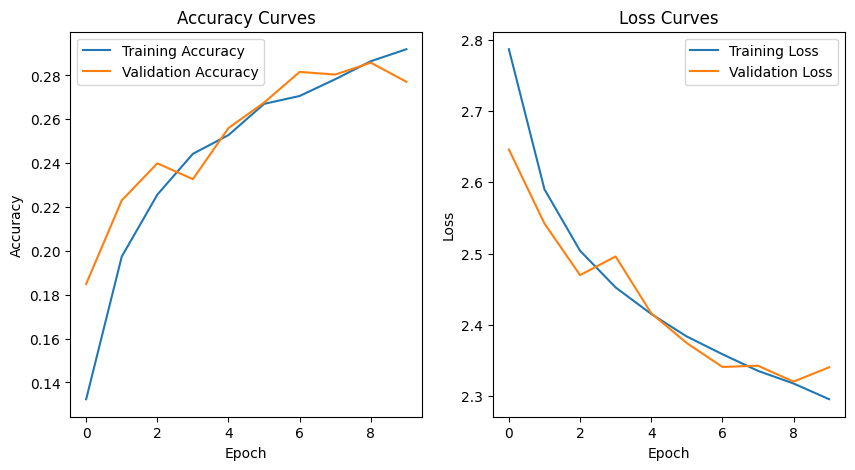

In [10]:
results = NN.evaluate(testImages, testLabelsC)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [11]:
predicted = NN(testImages)
predicted = predicted.numpy()
predictedLabels = []
for result in predicted:
    temp = np.array(result)
    label = np.where(result == max(result))
    predictedLabels.append(label[0][0])

confusionMatrix = tf.math.confusion_matrix(testLabelsC, predictedLabels)

In [12]:
for line in confusionMatrix:
    array = []
    for char in line:
        array.append(char.numpy())
    print(array)

[127, 37, 8, 5, 3, 2, 4, 51, 5, 26, 22, 63, 32, 0, 22, 0, 21, 4, 24, 44]
[54, 119, 35, 4, 38, 8, 1, 21, 8, 16, 18, 33, 26, 3, 30, 0, 36, 7, 18, 25]
[1, 9, 293, 14, 70, 4, 6, 22, 0, 3, 8, 10, 7, 2, 25, 0, 5, 9, 5, 7]
[12, 10, 23, 90, 41, 24, 15, 35, 4, 7, 12, 38, 17, 3, 60, 1, 33, 11, 20, 44]
[0, 7, 103, 3, 215, 3, 9, 45, 9, 3, 7, 17, 9, 4, 18, 0, 12, 15, 10, 11]
[20, 12, 24, 54, 26, 43, 13, 21, 1, 16, 29, 31, 16, 1, 47, 1, 31, 5, 56, 53]
[3, 7, 28, 18, 69, 6, 41, 41, 2, 15, 17, 34, 10, 2, 68, 1, 44, 4, 52, 38]
[16, 8, 41, 5, 24, 0, 6, 219, 6, 2, 5, 52, 29, 4, 15, 0, 22, 4, 9, 33]
[13, 5, 25, 11, 27, 7, 4, 55, 19, 11, 4, 94, 58, 5, 64, 0, 57, 6, 20, 15]
[15, 6, 2, 4, 8, 0, 1, 2, 3, 225, 69, 38, 5, 0, 10, 0, 15, 24, 32, 41]
[16, 15, 22, 4, 11, 1, 3, 17, 3, 132, 180, 32, 6, 0, 8, 0, 15, 4, 14, 17]
[8, 3, 18, 6, 10, 4, 7, 43, 2, 27, 10, 173, 37, 3, 31, 0, 34, 24, 29, 31]
[4, 10, 17, 6, 11, 8, 6, 61, 10, 7, 6, 80, 115, 3, 42, 2, 59, 0, 26, 27]
[18, 19, 53, 10, 39, 2, 12, 80, 7, 12, 16, 55, 

## Method 3: Support Vector Machine

In [14]:
print(np.shape(trainData))

(50000, 15876)


In [16]:
PCA = sklearn.decomposition.PCA(n_components = 15876)
PCA.fit(trainData)
PCA.explained_variance_ratio_
ev = PCA.explained_variance_ratio_.cumsum()
np.shape(ev)
numOfComponents = 1
for value in ev:
  if value < 0.9:
    numOfComponents += 1
print("optimal number of components = " + str(numOfComponents))

optimal number of components = 1563


In [17]:
PCA = sklearn.decomposition.PCA(n_components = 1563)
PCA.fit(trainData)
trainTransformed = PCA.transform(trainData)
testTransformed = PCA.transform(testData)

In [18]:
svm = sklearn.svm.SVC(kernel = 'linear', verbose=True)

svm.fit(trainTransformed, trainLabelsC.ravel())

print("accuracy: " + str(svm.score(testTransformed, testLabelsC)))

[LibSVM]accuracy: 0.221


In [19]:
predictedLabels = svm.predict(testTransformed)

confusionMatrix = confusion_matrix(testLabelsC, predictedLabels)

In [20]:
for line in confusionMatrix:
    print(line)

[91 46 22  7 27 10  5 33 27 17 21 28 27 15 14 31 25 17 18 19]
[ 48 115  22   7  23  13  20  38  16  11  16  18  25  25  11  39  25   7
  10  11]
[ 18  25 102  12  35  28  16  31  30   6  14  20  31  23  38  17  33   6
  12   3]
[  6  14  26 209  32  45  34  12  15   5   5  15   6  15  23   4   4   5
   8  17]
[ 33  33  36  53 110  33   6  22  22  14  14  14  20  17  14  15  17   9
   8  10]
[ 19  29  17  69  24 120  49  17  14  20   8  13   6  16  23  15   9   6
   8  18]
[  8  24   8  48  10  47 190  12   8  20  17   9   6  12  14   7   6   3
  17  34]
[ 27  38  40  17  18  12   4 105  33   6  12  13  35  38  19  34  21   4
  11  13]
[26 15 43 13 29  6 11 30 92 18 22 45 47 22 11 18 24 18  6  4]
[ 30  24  16   8  16   9  26  19  13 152  33  29   9  10  10  13  16  15
  18  34]
[ 42  37  13   3  12   7  17  10  14  62 148  20  15  13   2  12  12  17
  22  22]
[34 21 31 12 21 18  7 21 41 28 22 74 36 16 18 24 29 11 13 23]
[53 24 41  9 17 13 11 30 54 11 13 42 57 20 15 29 32 13  9  7]
[39 3

## Thought I would play around with 3d scatter plotting because it looked cool.

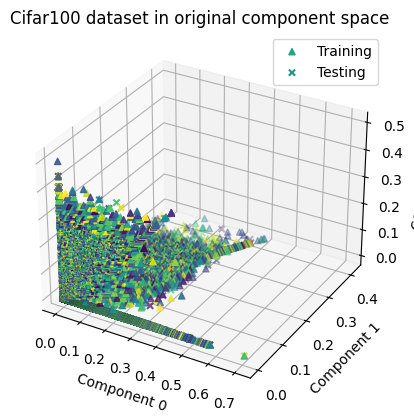

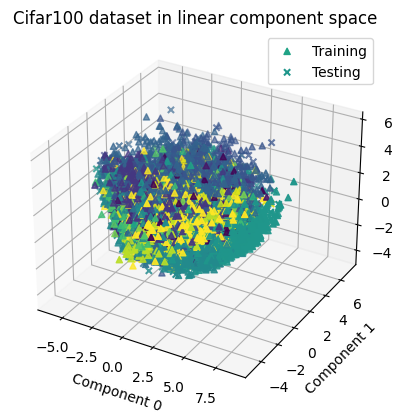

In [21]:
plt.figure()
ax = plt.axes(projection='3d')
plt.title("Cifar100 dataset in original component space")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")
ax.scatter3D(trainData[:,0], trainData[:,1], trainData[:,2], c = trainLabelsC, marker = '^', label = "Training")
ax.scatter3D(testData[:,0], testData[:,1], testData[:,2], c = testLabelsC, marker = "x", label = "Testing")
plt.legend()
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
plt.title("Cifar100 dataset in linear component space")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")
ax.scatter3D(trainTransformed[:,0], trainTransformed[:,1], trainTransformed[:,2], c = trainLabelsC, marker = '^', label = "Training")
ax.scatter3D(testTransformed[:,0], testTransformed[:,1], testTransformed[:,2], c = testLabelsC, marker = "x", label = "Testing")
plt.legend()
plt.show()

Methods Ranked Best to Worst for the coarse Labels:
1. CNN
2. NN
3. SVM

CNN was a clear winner with an accuracy almost 12% greater than the next most accurate method.

# Fine Labels Methods + Results

## Method 1: Convolutional Neural Network

In [13]:
CNN = tf.keras.Sequential(layers=[tf.keras.layers.Conv2D(32, (3, 3), activation = tf.nn.relu, input_shape = (32, 32, 3)),
                          tf.keras.layers.MaxPooling2D((2, 2)), 
                          tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu),
                          tf.keras.layers.MaxPooling2D((2, 2)), 
                          tf.keras.layers.Conv2D(64, (3, 3), activation = tf.nn.relu)])

CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(64, activation= tf.nn.relu))
CNN.add(tf.keras.layers.Dense(100))

In [14]:
CNN.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = CNN.fit(trainImages, trainLabelsF, epochs=10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 21s 16ms/step - loss: 4.5877 - accuracy: 0.0194 - val_loss: 4.5409 - val_accuracy: 0.0248
Epoch 2/10
1250/1250 [==============================] - 19s 16ms/step - loss: 4.4214 - accuracy: 0.0296 - val_loss: 4.2792 - val_accuracy: 0.0457
Epoch 3/10
1250/1250 [==============================] - 19s 16ms/step - loss: 4.1714 - accuracy: 0.0608 - val_loss: 4.1152 - val_accuracy: 0.0667
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 4.0176 - accuracy: 0.0845 - val_loss: 3.9837 - val_accuracy: 0.0907
Epoch 5/10
1250/1250 [==============================] - 19s 15ms/step - loss: 3.8901 - accuracy: 0.1052 - val_loss: 3.8493 - val_accuracy: 0.1180
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 3.7696 - accuracy: 0.1275 - val_loss: 3.7589 - val_accuracy: 0.1277
Epoch 7/10
1250/1250 [==============================] - 19s 16ms/step - loss: 3.6745 - accuracy: 0.1440 - val_loss: 3.6530 -

313/313 [==============================] - 2s 6ms/step - loss: 3.3419 - accuracy: 0.2053
Test set loss: 3.34, test set accuracy: 20.53%


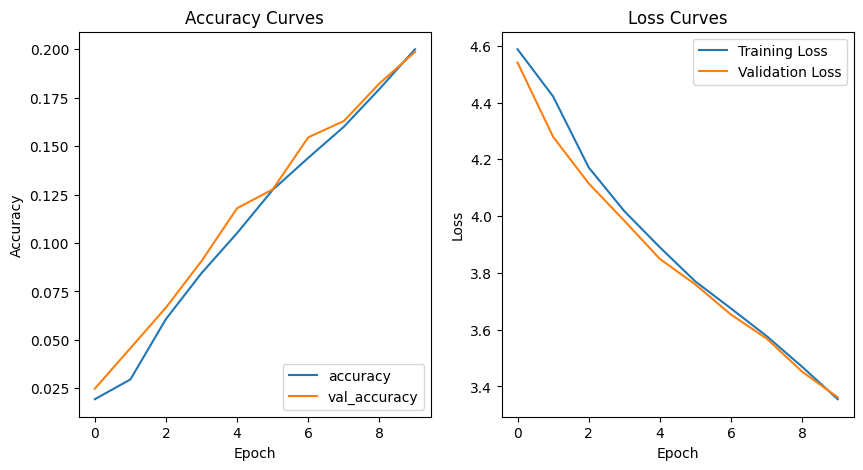

In [15]:
results = CNN.evaluate(testImages, testLabelsF)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [16]:
predicted = CNN(testImages)
predicted = predicted.numpy()
predictedLabels = []
for result in predicted:
    temp = np.array(result)
    label = np.where(result == max(result))
    predictedLabels.append(label[0][0])

confusionMatrix = tf.math.confusion_matrix(testLabelsF, predictedLabels)

In [17]:
for line in confusionMatrix:
    array = []
    for char in line:
        array.append(char.numpy())
    print(array)

[39, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 7, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 40, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 3, 6, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 7, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 2, 3, 0, 0, 3, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 17, 21, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 1, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 1, 13, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 5, 2, 1, 5, 0, 0, 4, 0, 0,

## Method 2: Regular Neural Network

In [18]:
NN = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.softmax)])

NN.compile(optimizer='SGD', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = NN.fit(trainImages, trainLabelsF, epochs=10, validation_split = 0.2, verbose=1)


Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 4.5598 - sparse_categorical_accuracy: 0.0185 - val_loss: 4.4780 - val_sparse_categorical_accuracy: 0.0247
Epoch 2/10
1250/1250 [==============================] - 2s 2ms/step - loss: 4.3106 - sparse_categorical_accuracy: 0.0435 - val_loss: 4.1701 - val_sparse_categorical_accuracy: 0.0640
Epoch 3/10
1250/1250 [==============================] - 2s 2ms/step - loss: 4.0807 - sparse_categorical_accuracy: 0.0779 - val_loss: 4.0211 - val_sparse_categorical_accuracy: 0.0851
Epoch 4/10
1250/1250 [==============================] - 2s 2ms/step - loss: 3.9527 - sparse_categorical_accuracy: 0.0951 - val_loss: 3.9243 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
1250/1250 [==============================] - 2s 2ms/step - loss: 3.8613 - sparse_categorical_accuracy: 0.1102 - val_loss: 3.8363 - val_sparse_categorical_accuracy: 0.1196
Epoch 6/10
1250/1250 [==============================] - 2s 2ms/step - loss: 3.7920 - spars

313/313 [==============================] - 0s 1ms/step - loss: 3.6667 - sparse_categorical_accuracy: 0.1516
Test set loss: 3.67, test set accuracy: 15.16%


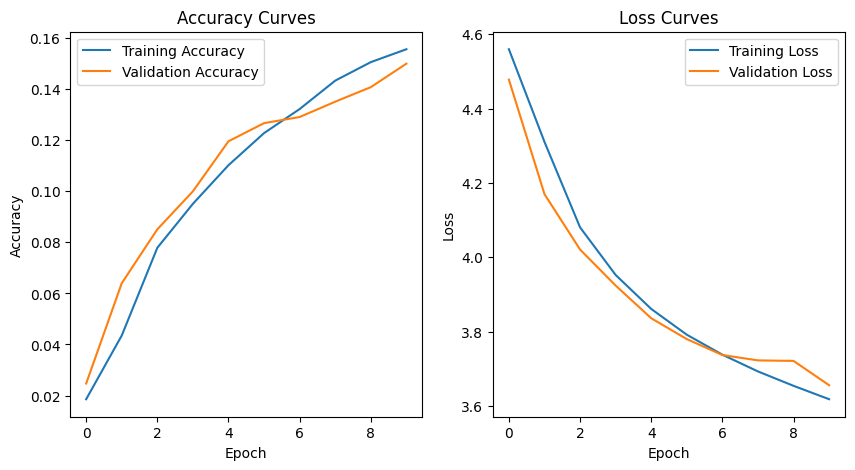

In [19]:
results = NN.evaluate(testImages, testLabelsF)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [20]:
predicted = NN(testImages)
predicted = predicted.numpy()
predictedLabels = []
for result in predicted:
    temp = np.array(result)
    label = np.where(result == max(result))
    predictedLabels.append(label[0][0])

confusionMatrix = tf.math.confusion_matrix(testLabelsF, predictedLabels)

In [21]:
for line in confusionMatrix:
    array = []
    for char in line:
        array.append(char.numpy())
    print(array)

[37, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]
[1, 37, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 3, 0, 4, 6, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 1, 4, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0]
[3, 3, 21, 0, 0, 8, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 2, 5, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 8, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 5, 1]
[1, 0, 1, 1, 6, 2, 1, 6, 0, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 3, 6, 2, 2, 3, 0, 1, 1, 1, 1, 0,

## Method 3: Support Vector Machine

In [31]:
trainData = np.array(trainFeatures)
testData = np.array(testFeatures)

PCA = sklearn.decomposition.PCA(n_components = 1563)
PCA.fit(trainData)
trainTransformed = PCA.transform(trainData)
testTransformed = PCA.transform(testData)

In [32]:
svm = sklearn.svm.SVC(kernel = 'linear', verbose=True)

svm.fit(trainTransformed, trainLabelsF.ravel())

print("accuracy: " + str(svm.score(testTransformed, testLabelsF)))

[LibSVM]accuracy: 0.1764


In [33]:
predictedLabels = svm.predict(testTransformed)

confusionMatrix = confusion_matrix(testLabelsF, predictedLabels)

In [34]:
for line in confusionMatrix:
    print(line)

[44  1  0  0  0  0  0  0  0  1  6  1  0  0  0  0  0  0  0  0  0  0  4  1
  1  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0  1  1  0  0  0  0  0
  1  0  0  0  1  5  0  0  0  3  1  0  0  2  0  0  0  0  0  1  0  0  5  0
  0  0  1  1  0  1  1  0  0  0  0  6  0  1  1  0  0  0  0  2  0  0  0  0
  1  0  1  1]
[ 0 21  0  1  1  0  0  3  0  1  0  0  0  1  1  0  1  0  1  1  0  3  1  5
  3  0  2  1  1  0  0  0  3  0  2  0  1  1  2  1  0  0  1  1  0  0  0  0
  0  0  1  1  0  2  0  2  0  3  0  0  0  0  1  1  1  0  3  1  0  0  2  0
  0  0  4  1  0  2  1  0  0  0  0  0  0  1  2  0  0  0  0  4  0  3  0  1
  0  1  1  1]
[2 2 3 0 2 1 0 2 1 3 1 3 1 0 2 0 0 0 3 1 1 3 1 0 1 0 1 1 0 0 1 0 2 0 1 5 3
 0 0 0 2 0 1 1 3 0 2 0 0 1 0 2 0 1 0 0 1 2 1 1 0 0 3 3 3 3 0 2 1 0 4 0 0 0
 2 2 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 2 1 1 0 1 1 1 1]
[ 1  1  1  8  3  0  1  1  3  1  0  1  0  0  1  3  0  3  1  2  0  2  1  2
  0  0  1  1  1  0  0 11  0  0  1  0  2  2  2  2  0  1  3  1  0  1  1  0
  0  0  2  1  0  2  0  1  1  1  0  2  

## Thought I would play around with 3d scatter plotting because it looked cool.

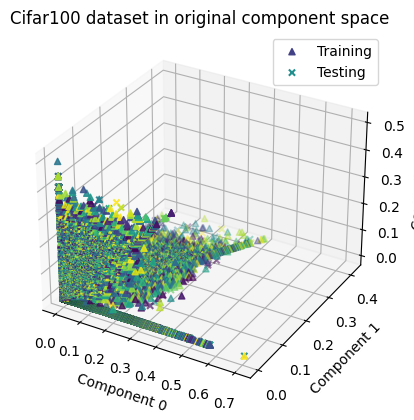

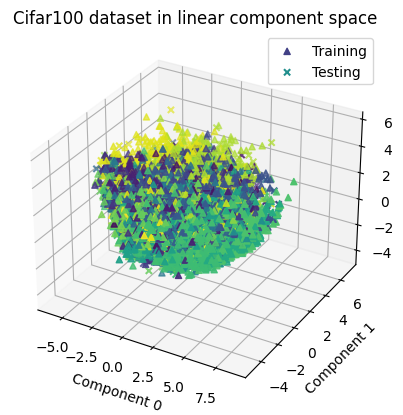

In [35]:
plt.figure()
ax = plt.axes(projection='3d')
plt.title("Cifar100 dataset in original component space")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")
ax.scatter3D(trainData[:,0], trainData[:,1], trainData[:,2], c = trainLabelsF, marker = '^', label = "Training")
ax.scatter3D(testData[:,0], testData[:,1], testData[:,2], c = testLabelsF, marker = "x", label = "Testing")
plt.legend()
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
plt.title("Cifar100 dataset in linear component space")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.set_zlabel("Component 2")
ax.scatter3D(trainTransformed[:,0], trainTransformed[:,1], trainTransformed[:,2], c = trainLabelsF, marker = '^', label = "Training")
ax.scatter3D(testTransformed[:,0], testTransformed[:,1], testTransformed[:,2], c = testLabelsF, marker = "x", label = "Testing")
plt.legend()
plt.show()

Methods Ranked Best to Worst for the fine Labels:
1. CNN
2. SVM
3. NN

All three methods achieved within 5% accuracy of each other when using the fine labels.